# 1.1 Linear Regression

In [72]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [73]:
np.random.seed(0)

## Question 1

In [74]:
#function to trasnform the data with a k-dimensional polynomial basis function
def map_features(X, k):
    '''
    X: input variables, explected to have dimensions (m x 1)
    k: dimension fo the basis function
    '''
    m = len(X)                                
    X_mat = np.zeros(shape=(m,k))          #initialized the transformed dataset with dimensions (m x k)
    for i in range(m):
        for j in range(k):
            X_mat[i][j] = X[i]**j          #mapping with a k-dimensional polynomial basis function
    return X_mat

#function to train a least square linear model and return the weights
def fit(X, y):
    '''
    X: the transformed data with dimensions of (m x k)
    y: the output variable with dimensions (m x 1)
    '''
    w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)        #the least squares normal equation
    return w

#function to calculate the mean square error
def mean_square_error(y_true, y_pred):
    SSE = 0
    for i in range(len(y_true)):
        SSE += (y_true[i]-y_pred[i])**2
    return SSE / len(y_true)

#function to plot the polynomials
def plot_linear_models(X, y, k_list, X_plot):
    fig = plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='k', label='data')          #plot the training points
    MSE = []
    for k in k_list:                              
        X_mat = map_features(X, k)                      #transform the training x-values
        w = fit(X_mat, y)                               #train the model and obtain the weight
        y_pred = np.dot(w, X_mat.T)                     #make predictions using the weights
        MSE.append(mean_square_error(y, y_pred))        #compute the mean square error
        X_plot_mat = map_features(X_plot, k)            #transform the x-values that we are going to plot
        y_pred = np.dot(w, X_plot_mat.T)                #get the predicted y-values using the weights
        plt.plot(X_plot, y_pred, label=f'k = {k}')      #plot the polynomial
    plt.title('Polynomials', fontsize=20) 
    plt.legend()
    return MSE

In [75]:
X = np.array([1,2,3,4])
y = np.array([3,2,0,5])

In [76]:
for k in [1,2,3]:
    X_mat = map_features(X, k)
    w = fit(X_mat, y)
    print(w)

[2.5]
[1.5 0.4]
[ 9.  -7.1  1.5]


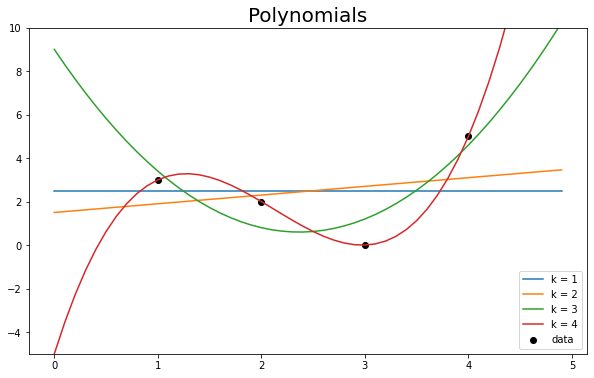

[3.25, 3.05, 0.8, 0.0]


In [77]:
k_list = [1,2,3,4]
X_plot = np.arange(0,5,0.1)                   #define the x-values for plotting with a range of [0,5]
MSE = plot_linear_models(X, y, k_list, X_plot)
plt.ylim(-5,10)
plt.show()
print([round(x,4) for x in MSE])

## Question 2

In [78]:
#function to generate the dataset
def sin_generator(m, sigma):
    x = np.random.uniform(low=0, high=1, size=m)           #smaple x values from Uniform(0,1)
    e = np.random.normal(loc=0, scale=sigma, size=m)       #sample noise values from N(0,sigma**2)
    y = np.sin(2*np.pi*x)**2 + e                           #compute the y values
    return x, y

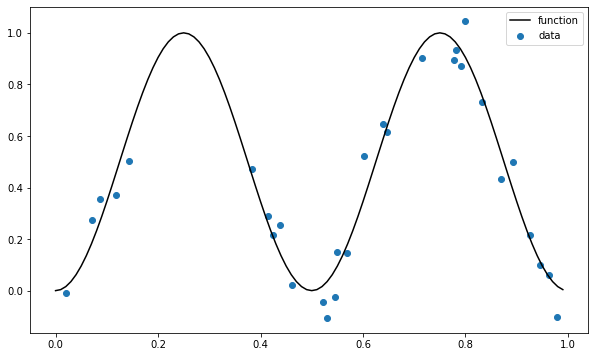

In [79]:
x_train, y_train = sin_generator(30, 0.07)                #generate the dataset

x_plot = np.arange(0,1,0.01)
y_plot = np.sin(2*np.pi*x_plot)**2

fig = plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train, label='data')                #plot the data points
plt.plot(x_plot, y_plot, label='function', color='k')      #plot the function
plt.legend()
plt.show()

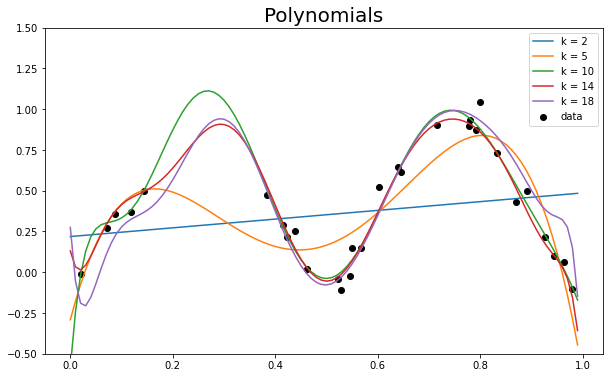

[0.1045, 0.0246, 0.0041, 0.0043, 0.0163]


In [80]:
k_list = [2,5,10,14,18]
X_plot = np.arange(0,1,0.01)                   #define the x-values for plotting with a range of [0,5]
MSE = plot_linear_models(x_train, y_train, k_list, X_plot) 
plt.ylim(-0.5,1.5)
plt.show()
print([round(x,4) for x in MSE])

In [81]:
#function to plot training and test error against the polynomial dimension
def plot_mse(X, y, X_test, y_test, k_list, mapper):
    MSE_train, MSE_test = [], []
    for k in k_list:                              
        X_mat = mapper(X, k)                                          #transform the training x-values
        X_test_mat = mapper(X_test, k)
        w = fit(X_mat, y)                                             #train the model and obtain the weight
        y_pred_train = np.dot(w, X_mat.T)                             #make predictions base on the training data
        y_pred_test = np.dot(w, X_test_mat.T)                         #make predictions base on the test data
        MSE_train.append(np.log(mean_square_error(y, y_pred_train)))  #compute the natural log of the mean square error
        MSE_test.append(np.log(mean_square_error(y_test, y_pred_test)))
    #plot the ln(MSE) against dimension                                    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axes[0].plot(k_list, MSE_train)                                       
    axes[0].set_xlabel('Dimension')
    axes[0].set_ylabel('log Train Error')
    axes[0].set_title('Train Error vs Dimensions', fontsize=16)  
    axes[1].plot(k_list, MSE_test)                                       
    axes[1].set_xlabel('Dimension')
    axes[1].set_ylabel('log Test Error')
    axes[1].set_title('Test Error vs Dimensions', fontsize=16)  
    plt.show()
    return MSE_train, MSE_test

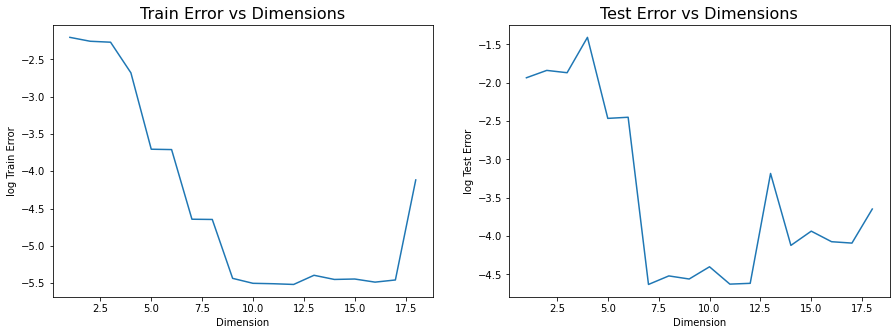

In [82]:
x_test, y_test = sin_generator(1000, 0.07)

k_list = np.arange(1,19,1)
MSE_train, MSE_test = plot_mse(x_train, y_train, x_test, y_test, k_list, map_features)

In [83]:
def plot_smooth_curve(k_list, n, mapper):
    avg_train_MSE, avg_test_MSE = [], []
    for k in tqdm(k_list):    
        MSE_train, MSE_test = [], []
        for i in range(n):   
            x_train, y_train = sin_generator(30, 0.07)           #generate 30 training data points      
            x_test, y_test = sin_generator(1000, 0.07)           #generate 1000 test data points        
            X_mat_train = mapper(x_train, k)                     #transform the input data 
            X_mat_test = mapper(x_test, k)
            w = fit(X_mat_train, y_train)                        #train the model
            y_pred_train = np.dot(w, X_mat_train.T)              #make prediction base on the training data
            y_pred_test = np.dot(w, X_mat_test.T)                #make prediction base on the test data
            MSE_train.append(mean_square_error(y_train, y_pred_train))         #compute the training error 
            MSE_test.append(mean_square_error(y_test, y_pred_test))            #compute the test error   
        avg_train_MSE.append(np.log(np.mean(MSE_train)))                       #compute the ln(average(training error))
        avg_test_MSE.append(np.log(np.mean(MSE_test)))                         #compute the ln(average(test error))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axes[0].plot(k_list, avg_train_MSE)                                       
    axes[0].set_xlabel('Dimension')
    axes[0].set_ylabel('log Train Error')
    axes[0].set_title('Smoothed Train Error vs Dimensions', fontsize=14)  
    axes[1].plot(k_list, avg_test_MSE)                                       
    axes[1].set_xlabel('Dimension')
    axes[1].set_ylabel('log Test Error')
    axes[1].set_title('Smoothed Test Error vs Dimensions', fontsize=14)  
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:17<00:00,  1.01it/s]


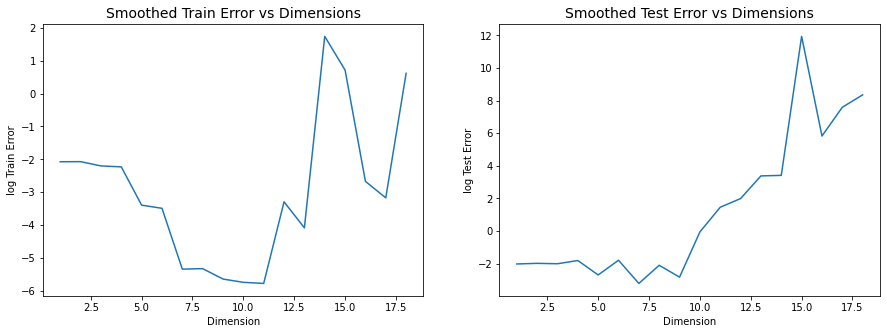

In [84]:
k_list = np.arange(1,19,1)
plot_smooth_curve(k_list, 100, map_features)

## Question 3

In [85]:
#function to trasnform the data with the sin(kπx) basis function
def sin_map_features(X, k):
    '''
    X: input variables, explected to have dimensions (m x 1)
    k: dimension fo the basis function
    '''
    m = len(X)                                
    X_mat = np.zeros(shape=(m,k))                 #initialized the transformed dataset with dimensions (m x k)
    for i in range(m):
        for j in range(k):
            X_mat[i][j] = np.sin((j+1)*np.pi*X[i])    #mapping with a k-dimensional polynomial basis function
    return X_mat

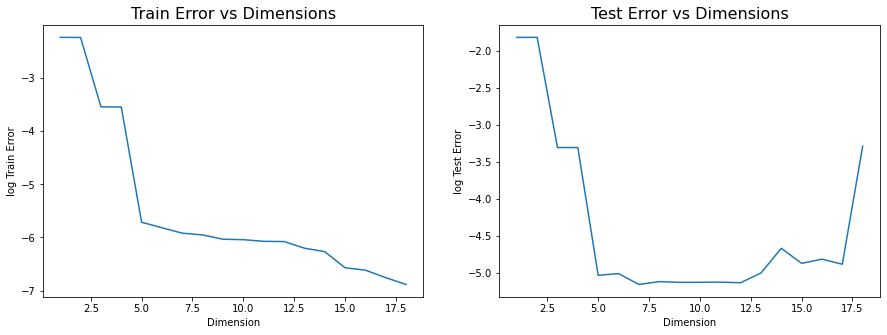

In [86]:
x_train, y_train = sin_generator(30, 0.07)
x_test, y_test = sin_generator(1000, 0.07)

k_list = np.arange(1,19,1)
MSE_train, MSE_test = plot_mse(x_train, y_train, x_test, y_test, k_list, sin_map_features)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:40<00:00,  2.25s/it]


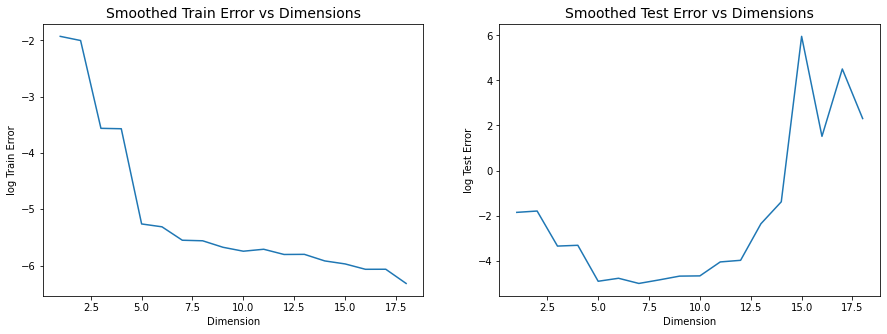

In [87]:
k_list = np.arange(1,19,1)
plot_smooth_curve(k_list, 100, sin_map_features)